In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score

In [5]:
df = pd.read_csv('iris.csv')

df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
flower_map = {'Iris-setosa':1,
             'Iris-versicolor':2,
             'Iris-virginica':3}

df['Species'] = df['Species'].map(flower_map)

df.to_csv('iris_indexed.csv', index=False)

In [7]:
df_adjusted = pd.read_csv('iris_indexed.csv')

In [24]:
x = df_adjusted.iloc[:,:-1]
y = df_adjusted.iloc[:,-1]
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
model = LogisticRegression(C=1, max_iter=1000)

In [26]:
model.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=1000)

In [27]:
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [28]:
error = y_test - y_pred
error

73     0
18     0
118    0
78     0
76     0
31     0
64     0
141    0
68     0
82     0
110    0
12     0
36     0
9      0
19     0
56     0
104    0
69     0
55     0
132    0
29     0
127    0
26     0
128    0
131    0
145    0
108    0
143    0
45     0
30     0
Name: Species, dtype: int64

In [29]:
f1_score(y_test, y_pred, average='weighted')

1.0

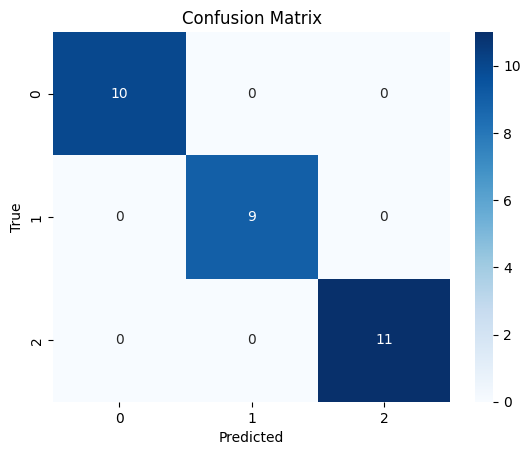

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [31]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3
146,147,6.3,2.5,5.0,1.9,3
147,148,6.5,3.0,5.2,2.0,3
148,149,6.2,3.4,5.4,2.3,3


In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C' : [0.01, 0.1, 1, 10],
    'penalty': ['l1','l2'],
    'solver' : ['liblinear']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, scoring = 'f1_weighted')

In [37]:
y_pred_grid = grid.fit(X_train, y_train)

print('Best F1', grid.best_score_)

Best F1 1.0


In [36]:
print("Best Params:", grid.best_params_)

Best Params: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
